# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

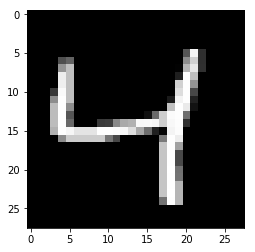

In [5]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
learning_rate = 0.01
image_size = 784

# Size of the encoding layer (the hidden layer)
encoding_dim = 128 # feel free to change this value

# Input and target placeholders

inputs_ = tf.placeholder(tf.float32, (None, image_size), name="inputs")
targets_ = tf.placeholder(tf.float32, (None, image_size), name="targets")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs=inputs_, units=encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(inputs=encoded, units=image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="outputs")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits, name="loss")
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

## Training

In [8]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [9]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6968
Epoch: 1/20... Training loss: 0.5381
Epoch: 1/20... Training loss: 0.3697
Epoch: 1/20... Training loss: 0.3384
Epoch: 1/20... Training loss: 0.3293
Epoch: 1/20... Training loss: 0.3138
Epoch: 1/20... Training loss: 0.3151
Epoch: 1/20... Training loss: 0.2934
Epoch: 1/20... Training loss: 0.2852
Epoch: 1/20... Training loss: 0.2828
Epoch: 1/20... Training loss: 0.2648
Epoch: 1/20... Training loss: 0.2540
Epoch: 1/20... Training loss: 0.2517
Epoch: 1/20... Training loss: 0.2521
Epoch: 1/20... Training loss: 0.2412
Epoch: 1/20... Training loss: 0.2251
Epoch: 1/20... Training loss: 0.2421
Epoch: 1/20... Training loss: 0.2256
Epoch: 1/20... Training loss: 0.2249
Epoch: 1/20... Training loss: 0.2178
Epoch: 1/20... Training loss: 0.2085
Epoch: 1/20... Training loss: 0.2120
Epoch: 1/20... Training loss: 0.2069
Epoch: 1/20... Training loss: 0.2020
Epoch: 1/20... Training loss: 0.1991
Epoch: 1/20... Training loss: 0.1977
Epoch: 1/20... Training loss: 0.1896
E

Epoch: 1/20... Training loss: 0.0821
Epoch: 1/20... Training loss: 0.0862
Epoch: 1/20... Training loss: 0.0875
Epoch: 1/20... Training loss: 0.0860
Epoch: 1/20... Training loss: 0.0869
Epoch: 1/20... Training loss: 0.0857
Epoch: 1/20... Training loss: 0.0860
Epoch: 1/20... Training loss: 0.0873
Epoch: 1/20... Training loss: 0.0865
Epoch: 1/20... Training loss: 0.0855
Epoch: 1/20... Training loss: 0.0834
Epoch: 1/20... Training loss: 0.0822
Epoch: 1/20... Training loss: 0.0843
Epoch: 1/20... Training loss: 0.0859
Epoch: 1/20... Training loss: 0.0838
Epoch: 1/20... Training loss: 0.0859
Epoch: 1/20... Training loss: 0.0857
Epoch: 1/20... Training loss: 0.0808
Epoch: 1/20... Training loss: 0.0885
Epoch: 1/20... Training loss: 0.0865
Epoch: 1/20... Training loss: 0.0831
Epoch: 1/20... Training loss: 0.0853
Epoch: 1/20... Training loss: 0.0841
Epoch: 1/20... Training loss: 0.0849
Epoch: 1/20... Training loss: 0.0832
Epoch: 1/20... Training loss: 0.0809
Epoch: 1/20... Training loss: 0.0845
E

Epoch: 2/20... Training loss: 0.0775
Epoch: 2/20... Training loss: 0.0773
Epoch: 2/20... Training loss: 0.0774
Epoch: 2/20... Training loss: 0.0737
Epoch: 2/20... Training loss: 0.0749
Epoch: 2/20... Training loss: 0.0770
Epoch: 2/20... Training loss: 0.0788
Epoch: 2/20... Training loss: 0.0756
Epoch: 2/20... Training loss: 0.0748
Epoch: 2/20... Training loss: 0.0766
Epoch: 2/20... Training loss: 0.0760
Epoch: 2/20... Training loss: 0.0786
Epoch: 2/20... Training loss: 0.0774
Epoch: 2/20... Training loss: 0.0753
Epoch: 2/20... Training loss: 0.0776
Epoch: 2/20... Training loss: 0.0749
Epoch: 2/20... Training loss: 0.0794
Epoch: 2/20... Training loss: 0.0763
Epoch: 2/20... Training loss: 0.0766
Epoch: 2/20... Training loss: 0.0753
Epoch: 2/20... Training loss: 0.0780
Epoch: 2/20... Training loss: 0.0767
Epoch: 2/20... Training loss: 0.0755
Epoch: 2/20... Training loss: 0.0742
Epoch: 2/20... Training loss: 0.0770
Epoch: 2/20... Training loss: 0.0759
Epoch: 2/20... Training loss: 0.0767
E

Epoch: 3/20... Training loss: 0.0715
Epoch: 3/20... Training loss: 0.0738
Epoch: 3/20... Training loss: 0.0723
Epoch: 3/20... Training loss: 0.0744
Epoch: 3/20... Training loss: 0.0747
Epoch: 3/20... Training loss: 0.0719
Epoch: 3/20... Training loss: 0.0726
Epoch: 3/20... Training loss: 0.0723
Epoch: 3/20... Training loss: 0.0745
Epoch: 3/20... Training loss: 0.0722
Epoch: 3/20... Training loss: 0.0740
Epoch: 3/20... Training loss: 0.0739
Epoch: 3/20... Training loss: 0.0732
Epoch: 3/20... Training loss: 0.0746
Epoch: 3/20... Training loss: 0.0726
Epoch: 3/20... Training loss: 0.0733
Epoch: 3/20... Training loss: 0.0733
Epoch: 3/20... Training loss: 0.0767
Epoch: 3/20... Training loss: 0.0764
Epoch: 3/20... Training loss: 0.0745
Epoch: 3/20... Training loss: 0.0731
Epoch: 3/20... Training loss: 0.0736
Epoch: 3/20... Training loss: 0.0781
Epoch: 3/20... Training loss: 0.0739
Epoch: 3/20... Training loss: 0.0748
Epoch: 3/20... Training loss: 0.0715
Epoch: 3/20... Training loss: 0.0746
E

Epoch: 4/20... Training loss: 0.0714
Epoch: 4/20... Training loss: 0.0723
Epoch: 4/20... Training loss: 0.0730
Epoch: 4/20... Training loss: 0.0737
Epoch: 4/20... Training loss: 0.0727
Epoch: 4/20... Training loss: 0.0736
Epoch: 4/20... Training loss: 0.0727
Epoch: 4/20... Training loss: 0.0723
Epoch: 4/20... Training loss: 0.0740
Epoch: 4/20... Training loss: 0.0720
Epoch: 4/20... Training loss: 0.0716
Epoch: 4/20... Training loss: 0.0729
Epoch: 4/20... Training loss: 0.0735
Epoch: 4/20... Training loss: 0.0711
Epoch: 4/20... Training loss: 0.0727
Epoch: 4/20... Training loss: 0.0746
Epoch: 4/20... Training loss: 0.0737
Epoch: 4/20... Training loss: 0.0727
Epoch: 4/20... Training loss: 0.0702
Epoch: 4/20... Training loss: 0.0741
Epoch: 4/20... Training loss: 0.0716
Epoch: 4/20... Training loss: 0.0737
Epoch: 4/20... Training loss: 0.0711
Epoch: 4/20... Training loss: 0.0727
Epoch: 4/20... Training loss: 0.0732
Epoch: 4/20... Training loss: 0.0712
Epoch: 4/20... Training loss: 0.0751
E

Epoch: 4/20... Training loss: 0.0747
Epoch: 4/20... Training loss: 0.0705
Epoch: 4/20... Training loss: 0.0725
Epoch: 4/20... Training loss: 0.0719
Epoch: 4/20... Training loss: 0.0732
Epoch: 4/20... Training loss: 0.0721
Epoch: 4/20... Training loss: 0.0721
Epoch: 4/20... Training loss: 0.0719
Epoch: 4/20... Training loss: 0.0715
Epoch: 4/20... Training loss: 0.0726
Epoch: 4/20... Training loss: 0.0718
Epoch: 4/20... Training loss: 0.0707
Epoch: 4/20... Training loss: 0.0701
Epoch: 4/20... Training loss: 0.0714
Epoch: 4/20... Training loss: 0.0720
Epoch: 4/20... Training loss: 0.0708
Epoch: 4/20... Training loss: 0.0708
Epoch: 4/20... Training loss: 0.0713
Epoch: 4/20... Training loss: 0.0702
Epoch: 4/20... Training loss: 0.0714
Epoch: 4/20... Training loss: 0.0708
Epoch: 4/20... Training loss: 0.0729
Epoch: 4/20... Training loss: 0.0709
Epoch: 4/20... Training loss: 0.0744
Epoch: 4/20... Training loss: 0.0694
Epoch: 4/20... Training loss: 0.0725
Epoch: 4/20... Training loss: 0.0711
E

Epoch: 5/20... Training loss: 0.0717
Epoch: 5/20... Training loss: 0.0740
Epoch: 5/20... Training loss: 0.0721
Epoch: 5/20... Training loss: 0.0705
Epoch: 5/20... Training loss: 0.0765
Epoch: 5/20... Training loss: 0.0741
Epoch: 5/20... Training loss: 0.0700
Epoch: 5/20... Training loss: 0.0714
Epoch: 5/20... Training loss: 0.0722
Epoch: 5/20... Training loss: 0.0738
Epoch: 5/20... Training loss: 0.0747
Epoch: 5/20... Training loss: 0.0712
Epoch: 5/20... Training loss: 0.0711
Epoch: 5/20... Training loss: 0.0713
Epoch: 5/20... Training loss: 0.0749
Epoch: 5/20... Training loss: 0.0698
Epoch: 5/20... Training loss: 0.0716
Epoch: 5/20... Training loss: 0.0718
Epoch: 5/20... Training loss: 0.0727
Epoch: 5/20... Training loss: 0.0698
Epoch: 5/20... Training loss: 0.0716
Epoch: 5/20... Training loss: 0.0723
Epoch: 5/20... Training loss: 0.0716
Epoch: 5/20... Training loss: 0.0730
Epoch: 5/20... Training loss: 0.0726
Epoch: 5/20... Training loss: 0.0732
Epoch: 5/20... Training loss: 0.0702
E

Epoch: 6/20... Training loss: 0.0702
Epoch: 6/20... Training loss: 0.0710
Epoch: 6/20... Training loss: 0.0711
Epoch: 6/20... Training loss: 0.0736
Epoch: 6/20... Training loss: 0.0718
Epoch: 6/20... Training loss: 0.0703
Epoch: 6/20... Training loss: 0.0731
Epoch: 6/20... Training loss: 0.0718
Epoch: 6/20... Training loss: 0.0725
Epoch: 6/20... Training loss: 0.0729
Epoch: 6/20... Training loss: 0.0696
Epoch: 6/20... Training loss: 0.0708
Epoch: 6/20... Training loss: 0.0730
Epoch: 6/20... Training loss: 0.0726
Epoch: 6/20... Training loss: 0.0723
Epoch: 6/20... Training loss: 0.0721
Epoch: 6/20... Training loss: 0.0719
Epoch: 6/20... Training loss: 0.0716
Epoch: 6/20... Training loss: 0.0710
Epoch: 6/20... Training loss: 0.0743
Epoch: 6/20... Training loss: 0.0719
Epoch: 6/20... Training loss: 0.0712
Epoch: 6/20... Training loss: 0.0715
Epoch: 6/20... Training loss: 0.0730
Epoch: 6/20... Training loss: 0.0725
Epoch: 6/20... Training loss: 0.0731
Epoch: 6/20... Training loss: 0.0705
E

Epoch: 7/20... Training loss: 0.0702
Epoch: 7/20... Training loss: 0.0723
Epoch: 7/20... Training loss: 0.0710
Epoch: 7/20... Training loss: 0.0706
Epoch: 7/20... Training loss: 0.0730
Epoch: 7/20... Training loss: 0.0715
Epoch: 7/20... Training loss: 0.0706
Epoch: 7/20... Training loss: 0.0707
Epoch: 7/20... Training loss: 0.0692
Epoch: 7/20... Training loss: 0.0726
Epoch: 7/20... Training loss: 0.0718
Epoch: 7/20... Training loss: 0.0715
Epoch: 7/20... Training loss: 0.0701
Epoch: 7/20... Training loss: 0.0712
Epoch: 7/20... Training loss: 0.0713
Epoch: 7/20... Training loss: 0.0713
Epoch: 7/20... Training loss: 0.0721
Epoch: 7/20... Training loss: 0.0701
Epoch: 7/20... Training loss: 0.0728
Epoch: 7/20... Training loss: 0.0703
Epoch: 7/20... Training loss: 0.0715
Epoch: 7/20... Training loss: 0.0710
Epoch: 7/20... Training loss: 0.0707
Epoch: 7/20... Training loss: 0.0706
Epoch: 7/20... Training loss: 0.0716
Epoch: 7/20... Training loss: 0.0739
Epoch: 7/20... Training loss: 0.0695
E

Epoch: 7/20... Training loss: 0.0723
Epoch: 7/20... Training loss: 0.0735
Epoch: 7/20... Training loss: 0.0714
Epoch: 7/20... Training loss: 0.0726
Epoch: 7/20... Training loss: 0.0705
Epoch: 7/20... Training loss: 0.0717
Epoch: 7/20... Training loss: 0.0732
Epoch: 7/20... Training loss: 0.0715
Epoch: 7/20... Training loss: 0.0711
Epoch: 7/20... Training loss: 0.0722
Epoch: 7/20... Training loss: 0.0736
Epoch: 7/20... Training loss: 0.0744
Epoch: 7/20... Training loss: 0.0700
Epoch: 7/20... Training loss: 0.0693
Epoch: 7/20... Training loss: 0.0697
Epoch: 7/20... Training loss: 0.0736
Epoch: 7/20... Training loss: 0.0722
Epoch: 7/20... Training loss: 0.0717
Epoch: 7/20... Training loss: 0.0716
Epoch: 7/20... Training loss: 0.0731
Epoch: 7/20... Training loss: 0.0693
Epoch: 7/20... Training loss: 0.0713
Epoch: 7/20... Training loss: 0.0705
Epoch: 7/20... Training loss: 0.0711
Epoch: 7/20... Training loss: 0.0684
Epoch: 7/20... Training loss: 0.0721
Epoch: 7/20... Training loss: 0.0712
E

Epoch: 8/20... Training loss: 0.0714
Epoch: 8/20... Training loss: 0.0712
Epoch: 8/20... Training loss: 0.0747
Epoch: 8/20... Training loss: 0.0720
Epoch: 8/20... Training loss: 0.0717
Epoch: 8/20... Training loss: 0.0746
Epoch: 8/20... Training loss: 0.0724
Epoch: 8/20... Training loss: 0.0696
Epoch: 8/20... Training loss: 0.0731
Epoch: 8/20... Training loss: 0.0727
Epoch: 8/20... Training loss: 0.0723
Epoch: 8/20... Training loss: 0.0719
Epoch: 8/20... Training loss: 0.0716
Epoch: 8/20... Training loss: 0.0710
Epoch: 8/20... Training loss: 0.0702
Epoch: 8/20... Training loss: 0.0743
Epoch: 8/20... Training loss: 0.0735
Epoch: 8/20... Training loss: 0.0703
Epoch: 8/20... Training loss: 0.0725
Epoch: 8/20... Training loss: 0.0717
Epoch: 8/20... Training loss: 0.0707
Epoch: 8/20... Training loss: 0.0712
Epoch: 8/20... Training loss: 0.0710
Epoch: 8/20... Training loss: 0.0701
Epoch: 8/20... Training loss: 0.0739
Epoch: 8/20... Training loss: 0.0716
Epoch: 8/20... Training loss: 0.0714
E

Epoch: 9/20... Training loss: 0.0711
Epoch: 9/20... Training loss: 0.0706
Epoch: 9/20... Training loss: 0.0737
Epoch: 9/20... Training loss: 0.0735
Epoch: 9/20... Training loss: 0.0702
Epoch: 9/20... Training loss: 0.0726
Epoch: 9/20... Training loss: 0.0699
Epoch: 9/20... Training loss: 0.0711
Epoch: 9/20... Training loss: 0.0733
Epoch: 9/20... Training loss: 0.0745
Epoch: 9/20... Training loss: 0.0731
Epoch: 9/20... Training loss: 0.0711
Epoch: 9/20... Training loss: 0.0715
Epoch: 9/20... Training loss: 0.0683
Epoch: 9/20... Training loss: 0.0700
Epoch: 9/20... Training loss: 0.0714
Epoch: 9/20... Training loss: 0.0689
Epoch: 9/20... Training loss: 0.0721
Epoch: 9/20... Training loss: 0.0706
Epoch: 9/20... Training loss: 0.0702
Epoch: 9/20... Training loss: 0.0724
Epoch: 9/20... Training loss: 0.0723
Epoch: 9/20... Training loss: 0.0724
Epoch: 9/20... Training loss: 0.0720
Epoch: 9/20... Training loss: 0.0718
Epoch: 9/20... Training loss: 0.0702
Epoch: 9/20... Training loss: 0.0716
E

Epoch: 10/20... Training loss: 0.0724
Epoch: 10/20... Training loss: 0.0709
Epoch: 10/20... Training loss: 0.0720
Epoch: 10/20... Training loss: 0.0723
Epoch: 10/20... Training loss: 0.0696
Epoch: 10/20... Training loss: 0.0704
Epoch: 10/20... Training loss: 0.0716
Epoch: 10/20... Training loss: 0.0718
Epoch: 10/20... Training loss: 0.0716
Epoch: 10/20... Training loss: 0.0695
Epoch: 10/20... Training loss: 0.0697
Epoch: 10/20... Training loss: 0.0709
Epoch: 10/20... Training loss: 0.0699
Epoch: 10/20... Training loss: 0.0708
Epoch: 10/20... Training loss: 0.0708
Epoch: 10/20... Training loss: 0.0747
Epoch: 10/20... Training loss: 0.0723
Epoch: 10/20... Training loss: 0.0718
Epoch: 10/20... Training loss: 0.0714
Epoch: 10/20... Training loss: 0.0735
Epoch: 10/20... Training loss: 0.0725
Epoch: 10/20... Training loss: 0.0712
Epoch: 10/20... Training loss: 0.0716
Epoch: 10/20... Training loss: 0.0714
Epoch: 10/20... Training loss: 0.0710
Epoch: 10/20... Training loss: 0.0721
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0731
Epoch: 10/20... Training loss: 0.0713
Epoch: 10/20... Training loss: 0.0724
Epoch: 10/20... Training loss: 0.0737
Epoch: 10/20... Training loss: 0.0725
Epoch: 10/20... Training loss: 0.0717
Epoch: 10/20... Training loss: 0.0700
Epoch: 10/20... Training loss: 0.0702
Epoch: 10/20... Training loss: 0.0719
Epoch: 10/20... Training loss: 0.0720
Epoch: 10/20... Training loss: 0.0710
Epoch: 10/20... Training loss: 0.0714
Epoch: 10/20... Training loss: 0.0696
Epoch: 10/20... Training loss: 0.0702
Epoch: 10/20... Training loss: 0.0722
Epoch: 10/20... Training loss: 0.0723
Epoch: 10/20... Training loss: 0.0710
Epoch: 10/20... Training loss: 0.0702
Epoch: 10/20... Training loss: 0.0729
Epoch: 10/20... Training loss: 0.0737
Epoch: 10/20... Training loss: 0.0712
Epoch: 10/20... Training loss: 0.0718
Epoch: 10/20... Training loss: 0.0735
Epoch: 10/20... Training loss: 0.0712
Epoch: 10/20... Training loss: 0.0714
Epoch: 10/20... Training loss: 0.0720
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0708
Epoch: 11/20... Training loss: 0.0744
Epoch: 11/20... Training loss: 0.0752
Epoch: 11/20... Training loss: 0.0712
Epoch: 11/20... Training loss: 0.0721
Epoch: 11/20... Training loss: 0.0709
Epoch: 11/20... Training loss: 0.0714
Epoch: 11/20... Training loss: 0.0711
Epoch: 11/20... Training loss: 0.0728
Epoch: 11/20... Training loss: 0.0712
Epoch: 11/20... Training loss: 0.0698
Epoch: 11/20... Training loss: 0.0730
Epoch: 11/20... Training loss: 0.0680
Epoch: 11/20... Training loss: 0.0705
Epoch: 11/20... Training loss: 0.0707
Epoch: 11/20... Training loss: 0.0717
Epoch: 11/20... Training loss: 0.0714
Epoch: 11/20... Training loss: 0.0738
Epoch: 11/20... Training loss: 0.0714
Epoch: 11/20... Training loss: 0.0723
Epoch: 11/20... Training loss: 0.0729
Epoch: 11/20... Training loss: 0.0739
Epoch: 11/20... Training loss: 0.0730
Epoch: 11/20... Training loss: 0.0716
Epoch: 11/20... Training loss: 0.0754
Epoch: 11/20... Training loss: 0.0709
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0695
Epoch: 12/20... Training loss: 0.0712
Epoch: 12/20... Training loss: 0.0696
Epoch: 12/20... Training loss: 0.0702
Epoch: 12/20... Training loss: 0.0726
Epoch: 12/20... Training loss: 0.0732
Epoch: 12/20... Training loss: 0.0723
Epoch: 12/20... Training loss: 0.0718
Epoch: 12/20... Training loss: 0.0706
Epoch: 12/20... Training loss: 0.0715
Epoch: 12/20... Training loss: 0.0722
Epoch: 12/20... Training loss: 0.0733
Epoch: 12/20... Training loss: 0.0704
Epoch: 12/20... Training loss: 0.0718
Epoch: 12/20... Training loss: 0.0712
Epoch: 12/20... Training loss: 0.0730
Epoch: 12/20... Training loss: 0.0722
Epoch: 12/20... Training loss: 0.0713
Epoch: 12/20... Training loss: 0.0708
Epoch: 12/20... Training loss: 0.0726
Epoch: 12/20... Training loss: 0.0702
Epoch: 12/20... Training loss: 0.0714
Epoch: 12/20... Training loss: 0.0712
Epoch: 12/20... Training loss: 0.0722
Epoch: 12/20... Training loss: 0.0696
Epoch: 12/20... Training loss: 0.0731
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0719
Epoch: 13/20... Training loss: 0.0686
Epoch: 13/20... Training loss: 0.0709
Epoch: 13/20... Training loss: 0.0725
Epoch: 13/20... Training loss: 0.0710
Epoch: 13/20... Training loss: 0.0728
Epoch: 13/20... Training loss: 0.0725
Epoch: 13/20... Training loss: 0.0696
Epoch: 13/20... Training loss: 0.0718
Epoch: 13/20... Training loss: 0.0693
Epoch: 13/20... Training loss: 0.0704
Epoch: 13/20... Training loss: 0.0727
Epoch: 13/20... Training loss: 0.0721
Epoch: 13/20... Training loss: 0.0710
Epoch: 13/20... Training loss: 0.0715
Epoch: 13/20... Training loss: 0.0705
Epoch: 13/20... Training loss: 0.0719
Epoch: 13/20... Training loss: 0.0688
Epoch: 13/20... Training loss: 0.0741
Epoch: 13/20... Training loss: 0.0713
Epoch: 13/20... Training loss: 0.0717
Epoch: 13/20... Training loss: 0.0718
Epoch: 13/20... Training loss: 0.0705
Epoch: 13/20... Training loss: 0.0710
Epoch: 13/20... Training loss: 0.0697
Epoch: 13/20... Training loss: 0.0709
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0699
Epoch: 13/20... Training loss: 0.0695
Epoch: 13/20... Training loss: 0.0711
Epoch: 13/20... Training loss: 0.0695
Epoch: 13/20... Training loss: 0.0720
Epoch: 13/20... Training loss: 0.0715
Epoch: 13/20... Training loss: 0.0711
Epoch: 13/20... Training loss: 0.0705
Epoch: 13/20... Training loss: 0.0706
Epoch: 13/20... Training loss: 0.0716
Epoch: 13/20... Training loss: 0.0726
Epoch: 13/20... Training loss: 0.0717
Epoch: 13/20... Training loss: 0.0705
Epoch: 13/20... Training loss: 0.0700
Epoch: 13/20... Training loss: 0.0723
Epoch: 13/20... Training loss: 0.0714
Epoch: 13/20... Training loss: 0.0723
Epoch: 13/20... Training loss: 0.0716
Epoch: 13/20... Training loss: 0.0713
Epoch: 13/20... Training loss: 0.0705
Epoch: 13/20... Training loss: 0.0706
Epoch: 13/20... Training loss: 0.0726
Epoch: 13/20... Training loss: 0.0705
Epoch: 13/20... Training loss: 0.0720
Epoch: 13/20... Training loss: 0.0715
Epoch: 13/20... Training loss: 0.0724
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0731
Epoch: 14/20... Training loss: 0.0697
Epoch: 14/20... Training loss: 0.0706
Epoch: 14/20... Training loss: 0.0706
Epoch: 14/20... Training loss: 0.0717
Epoch: 14/20... Training loss: 0.0732
Epoch: 14/20... Training loss: 0.0732
Epoch: 14/20... Training loss: 0.0704
Epoch: 14/20... Training loss: 0.0709
Epoch: 14/20... Training loss: 0.0719
Epoch: 14/20... Training loss: 0.0722
Epoch: 14/20... Training loss: 0.0690
Epoch: 14/20... Training loss: 0.0727
Epoch: 14/20... Training loss: 0.0702
Epoch: 14/20... Training loss: 0.0712
Epoch: 14/20... Training loss: 0.0731
Epoch: 14/20... Training loss: 0.0704
Epoch: 14/20... Training loss: 0.0735
Epoch: 14/20... Training loss: 0.0729
Epoch: 14/20... Training loss: 0.0727
Epoch: 14/20... Training loss: 0.0730
Epoch: 14/20... Training loss: 0.0718
Epoch: 14/20... Training loss: 0.0703
Epoch: 14/20... Training loss: 0.0713
Epoch: 14/20... Training loss: 0.0717
Epoch: 14/20... Training loss: 0.0709
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0719
Epoch: 15/20... Training loss: 0.0702
Epoch: 15/20... Training loss: 0.0692
Epoch: 15/20... Training loss: 0.0725
Epoch: 15/20... Training loss: 0.0712
Epoch: 15/20... Training loss: 0.0715
Epoch: 15/20... Training loss: 0.0719
Epoch: 15/20... Training loss: 0.0702
Epoch: 15/20... Training loss: 0.0708
Epoch: 15/20... Training loss: 0.0708
Epoch: 15/20... Training loss: 0.0726
Epoch: 15/20... Training loss: 0.0711
Epoch: 15/20... Training loss: 0.0715
Epoch: 15/20... Training loss: 0.0717
Epoch: 15/20... Training loss: 0.0716
Epoch: 15/20... Training loss: 0.0711
Epoch: 15/20... Training loss: 0.0724
Epoch: 15/20... Training loss: 0.0716
Epoch: 15/20... Training loss: 0.0703
Epoch: 15/20... Training loss: 0.0702
Epoch: 15/20... Training loss: 0.0718
Epoch: 15/20... Training loss: 0.0717
Epoch: 15/20... Training loss: 0.0725
Epoch: 15/20... Training loss: 0.0710
Epoch: 15/20... Training loss: 0.0728
Epoch: 15/20... Training loss: 0.0710
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0701
Epoch: 16/20... Training loss: 0.0719
Epoch: 16/20... Training loss: 0.0703
Epoch: 16/20... Training loss: 0.0731
Epoch: 16/20... Training loss: 0.0739
Epoch: 16/20... Training loss: 0.0723
Epoch: 16/20... Training loss: 0.0702
Epoch: 16/20... Training loss: 0.0730
Epoch: 16/20... Training loss: 0.0720
Epoch: 16/20... Training loss: 0.0691
Epoch: 16/20... Training loss: 0.0720
Epoch: 16/20... Training loss: 0.0709
Epoch: 16/20... Training loss: 0.0722
Epoch: 16/20... Training loss: 0.0716
Epoch: 16/20... Training loss: 0.0722
Epoch: 16/20... Training loss: 0.0688
Epoch: 16/20... Training loss: 0.0702
Epoch: 16/20... Training loss: 0.0748
Epoch: 16/20... Training loss: 0.0720
Epoch: 16/20... Training loss: 0.0713
Epoch: 16/20... Training loss: 0.0713
Epoch: 16/20... Training loss: 0.0714
Epoch: 16/20... Training loss: 0.0693
Epoch: 16/20... Training loss: 0.0740
Epoch: 16/20... Training loss: 0.0712
Epoch: 16/20... Training loss: 0.0737
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0687
Epoch: 16/20... Training loss: 0.0717
Epoch: 16/20... Training loss: 0.0724
Epoch: 16/20... Training loss: 0.0710
Epoch: 16/20... Training loss: 0.0722
Epoch: 16/20... Training loss: 0.0718
Epoch: 16/20... Training loss: 0.0689
Epoch: 16/20... Training loss: 0.0715
Epoch: 16/20... Training loss: 0.0730
Epoch: 16/20... Training loss: 0.0723
Epoch: 16/20... Training loss: 0.0706
Epoch: 16/20... Training loss: 0.0728
Epoch: 16/20... Training loss: 0.0716
Epoch: 16/20... Training loss: 0.0731
Epoch: 16/20... Training loss: 0.0707
Epoch: 16/20... Training loss: 0.0714
Epoch: 16/20... Training loss: 0.0730
Epoch: 16/20... Training loss: 0.0713
Epoch: 16/20... Training loss: 0.0723
Epoch: 16/20... Training loss: 0.0730
Epoch: 16/20... Training loss: 0.0744
Epoch: 16/20... Training loss: 0.0716
Epoch: 16/20... Training loss: 0.0717
Epoch: 16/20... Training loss: 0.0713
Epoch: 16/20... Training loss: 0.0710
Epoch: 16/20... Training loss: 0.0710
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0724
Epoch: 17/20... Training loss: 0.0727
Epoch: 17/20... Training loss: 0.0707
Epoch: 17/20... Training loss: 0.0704
Epoch: 17/20... Training loss: 0.0696
Epoch: 17/20... Training loss: 0.0705
Epoch: 17/20... Training loss: 0.0686
Epoch: 17/20... Training loss: 0.0743
Epoch: 17/20... Training loss: 0.0691
Epoch: 17/20... Training loss: 0.0708
Epoch: 17/20... Training loss: 0.0714
Epoch: 17/20... Training loss: 0.0752
Epoch: 17/20... Training loss: 0.0720
Epoch: 17/20... Training loss: 0.0720
Epoch: 17/20... Training loss: 0.0724
Epoch: 17/20... Training loss: 0.0717
Epoch: 17/20... Training loss: 0.0720
Epoch: 17/20... Training loss: 0.0711
Epoch: 17/20... Training loss: 0.0698
Epoch: 17/20... Training loss: 0.0701
Epoch: 17/20... Training loss: 0.0719
Epoch: 17/20... Training loss: 0.0706
Epoch: 17/20... Training loss: 0.0714
Epoch: 17/20... Training loss: 0.0725
Epoch: 17/20... Training loss: 0.0703
Epoch: 17/20... Training loss: 0.0727
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0719
Epoch: 18/20... Training loss: 0.0699
Epoch: 18/20... Training loss: 0.0697
Epoch: 18/20... Training loss: 0.0699
Epoch: 18/20... Training loss: 0.0728
Epoch: 18/20... Training loss: 0.0714
Epoch: 18/20... Training loss: 0.0731
Epoch: 18/20... Training loss: 0.0708
Epoch: 18/20... Training loss: 0.0721
Epoch: 18/20... Training loss: 0.0723
Epoch: 18/20... Training loss: 0.0718
Epoch: 18/20... Training loss: 0.0702
Epoch: 18/20... Training loss: 0.0701
Epoch: 18/20... Training loss: 0.0713
Epoch: 18/20... Training loss: 0.0720
Epoch: 18/20... Training loss: 0.0707
Epoch: 18/20... Training loss: 0.0722
Epoch: 18/20... Training loss: 0.0716
Epoch: 18/20... Training loss: 0.0719
Epoch: 18/20... Training loss: 0.0710
Epoch: 18/20... Training loss: 0.0705
Epoch: 18/20... Training loss: 0.0696
Epoch: 18/20... Training loss: 0.0697
Epoch: 18/20... Training loss: 0.0711
Epoch: 18/20... Training loss: 0.0747
Epoch: 18/20... Training loss: 0.0713
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0699
Epoch: 19/20... Training loss: 0.0708
Epoch: 19/20... Training loss: 0.0714
Epoch: 19/20... Training loss: 0.0711
Epoch: 19/20... Training loss: 0.0704
Epoch: 19/20... Training loss: 0.0707
Epoch: 19/20... Training loss: 0.0711
Epoch: 19/20... Training loss: 0.0719
Epoch: 19/20... Training loss: 0.0685
Epoch: 19/20... Training loss: 0.0706
Epoch: 19/20... Training loss: 0.0715
Epoch: 19/20... Training loss: 0.0725
Epoch: 19/20... Training loss: 0.0712
Epoch: 19/20... Training loss: 0.0729
Epoch: 19/20... Training loss: 0.0699
Epoch: 19/20... Training loss: 0.0720
Epoch: 19/20... Training loss: 0.0685
Epoch: 19/20... Training loss: 0.0730
Epoch: 19/20... Training loss: 0.0691
Epoch: 19/20... Training loss: 0.0719
Epoch: 19/20... Training loss: 0.0719
Epoch: 19/20... Training loss: 0.0736
Epoch: 19/20... Training loss: 0.0684
Epoch: 19/20... Training loss: 0.0726
Epoch: 19/20... Training loss: 0.0716
Epoch: 19/20... Training loss: 0.0690
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0714
Epoch: 19/20... Training loss: 0.0692
Epoch: 19/20... Training loss: 0.0698
Epoch: 19/20... Training loss: 0.0735
Epoch: 19/20... Training loss: 0.0706
Epoch: 19/20... Training loss: 0.0727
Epoch: 19/20... Training loss: 0.0721
Epoch: 19/20... Training loss: 0.0699
Epoch: 19/20... Training loss: 0.0720
Epoch: 19/20... Training loss: 0.0729
Epoch: 19/20... Training loss: 0.0705
Epoch: 19/20... Training loss: 0.0724
Epoch: 19/20... Training loss: 0.0713
Epoch: 19/20... Training loss: 0.0737
Epoch: 19/20... Training loss: 0.0722
Epoch: 19/20... Training loss: 0.0711
Epoch: 19/20... Training loss: 0.0713
Epoch: 19/20... Training loss: 0.0727
Epoch: 19/20... Training loss: 0.0689
Epoch: 19/20... Training loss: 0.0700
Epoch: 19/20... Training loss: 0.0720
Epoch: 19/20... Training loss: 0.0727
Epoch: 19/20... Training loss: 0.0706
Epoch: 19/20... Training loss: 0.0712
Epoch: 19/20... Training loss: 0.0731
Epoch: 19/20... Training loss: 0.0723
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0712
Epoch: 20/20... Training loss: 0.0701
Epoch: 20/20... Training loss: 0.0690
Epoch: 20/20... Training loss: 0.0707
Epoch: 20/20... Training loss: 0.0722
Epoch: 20/20... Training loss: 0.0737
Epoch: 20/20... Training loss: 0.0707
Epoch: 20/20... Training loss: 0.0691
Epoch: 20/20... Training loss: 0.0702
Epoch: 20/20... Training loss: 0.0713
Epoch: 20/20... Training loss: 0.0737
Epoch: 20/20... Training loss: 0.0721
Epoch: 20/20... Training loss: 0.0711
Epoch: 20/20... Training loss: 0.0733
Epoch: 20/20... Training loss: 0.0720
Epoch: 20/20... Training loss: 0.0733
Epoch: 20/20... Training loss: 0.0718
Epoch: 20/20... Training loss: 0.0694
Epoch: 20/20... Training loss: 0.0702
Epoch: 20/20... Training loss: 0.0716
Epoch: 20/20... Training loss: 0.0736
Epoch: 20/20... Training loss: 0.0735
Epoch: 20/20... Training loss: 0.0723
Epoch: 20/20... Training loss: 0.0730
Epoch: 20/20... Training loss: 0.0727
Epoch: 20/20... Training loss: 0.0732
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

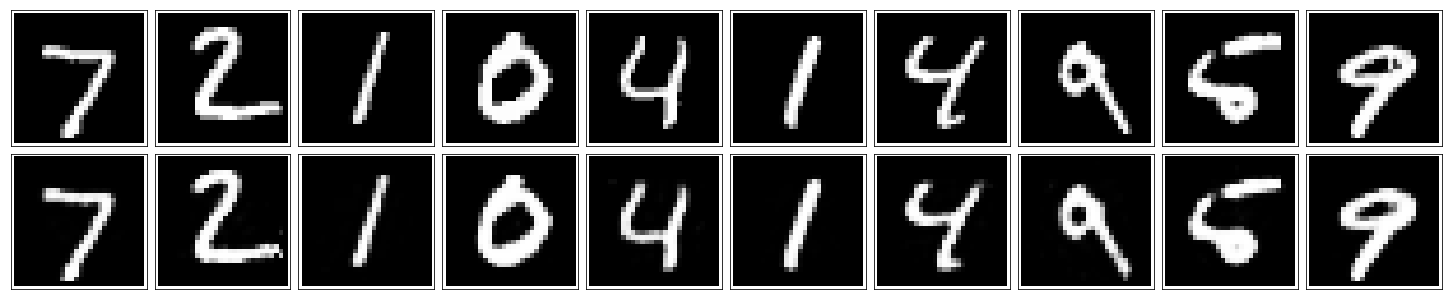

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [11]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.